# Generalidades de Python

In [16]:
# Importamos todas las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display

In [18]:
# Probando arrays
array = np.arange(10)
array_cuadrado = np.square(array)
print("Array original: ", array)
print("Array al cuadrado: ", array_cuadrado)

Array original:  [0 1 2 3 4 5 6 7 8 9]
Array al cuadrado:  [ 0  1  4  9 16 25 36 49 64 81]


In [19]:
# Pruebas
valores = np.linspace(0,10,5) # 5 valores entre 0 y 10
print(valores)

[ 0.   2.5  5.   7.5 10. ]


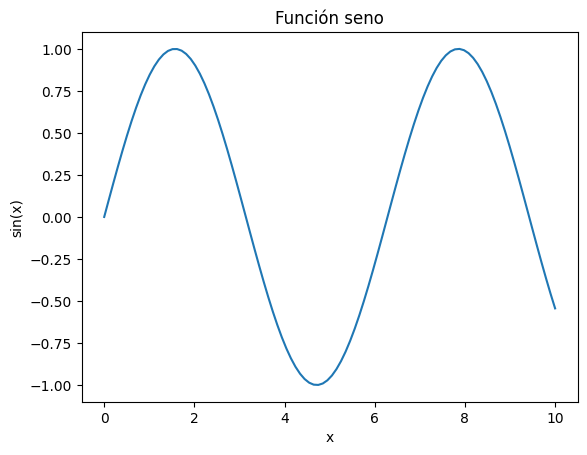

In [20]:
# Gráfica de la función seno
x = np.linspace(0, 10, 100) # Cada incremento/cada paso es entre 100
y = np.sin(x)

# La gráfica es:
plt.plot(x, y)
plt.title("Función seno")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

In [21]:
type(y) # permite saber que tipo de dato es y, o sea, un array de numpy

numpy.ndarray

In [22]:
# Lista de listas, matriz
s = [[1,2,3],[4,5,6]] 

# Slider desplegado

In [8]:
slinder = widgets.IntSlider(value=5, min=0, max=10, step=1, description='Valor:') # Crear un slider que manejará valores de 0 a 10
display(slinder) # Mostrar el slider

IntSlider(value=5, description='Valor:', max=10)

# El ejemplo siguiente es una ecuación diferencial simple y gráfica de su solución.

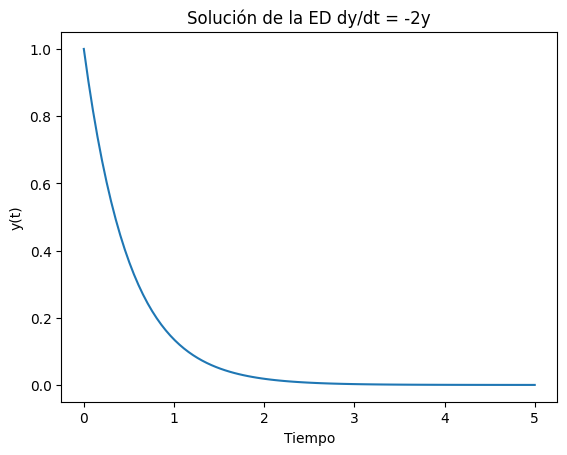

In [9]:
# Definimos la ED
def modelo(y, t):
    dydt = -2 * y
    return dydt

# Definimos las condiciones iniciales
y0 = 1

#Puntos de tiempo
t = np.linspace(0, 5, 100)

# Resolver la ED
y = odeint(modelo, y0, t)

# Graficar la solución
plt.plot(t, y)
plt.title("Solución de la ED dy/dt = -2y")
plt.xlabel("Tiempo")
plt.ylabel("y(t)")
plt.show()

Ejercicio #1: Resolver la ecuación diferencial dy/dt = -a*y, siendo ”a” un párametro controlable mediante un slider creado con ipywidgets. Gráficar la solución usando matplotlib. Cada vez que el valor del slider cambia, la gráfica debe actualizarse automáticamente.

In [ ]:
# Definiendo la ED
def modelo(y, t, a):
    dydt = -a * y
    return dydt

# Función para graficar la solución con un valor de 'a' dado por el slider
def graficar_solucion(a):
    
    #Condición inicial
    y0 = 1

    # Puntos de tiempo
    t = np.linspace(0, 5, 100)

    # Resolver la ED
    y = odeint(modelo, y0, t, args=(a,))

    # Graficar la solución
    plt.plot(t, y)
    plt.title(f"Solución de la ED con a = {a}")
    plt.xlabel("Tiempo")
    plt.ylabel("y(t)")
    plt.show()

# Crear un slider para el parámetro 'a'
slider_a = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='a:')

# Conectar el slider con la función de graficar
widgets.interact(graficar_solucion, a=slider_a)

interactive(children=(FloatSlider(value=1.0, description='a:', max=5.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.graficar_solucion(a)>

# Actividad de laboratorio

1. ¿Qué sucedería si para el ejemplo de la gráfica de la función seno se reduce el valor máx del intervalo de la función linspace? ¿Hasta qué valor máximo merece la pena el establecimiento de este parámetro?


Para responder la primera pregunta es que se pierde muestreo, gráfica menos exacta a medida que se reduce el incremento, ya que toma menos datos? 


Para la segunda pregunta: jugando con el incremento surge la pregunta de hasta que valor máximo merece la pena el incremento, a partir del 10000000 se nota un poco más de gasto computacional, compilando en un tiempo de 1.1s. Al añadir un cero de más el costo computacional es muchísimo mayor! no vale nada la pena hacer un muestreo de esa manera, incluso la sesión se me crasheo y salió de mi entorno (visual). Entrando y corriendo de nuevo en visual, compiló en 17.8s.


Rta definitiva: Al disminuir el último parámetro de np.linspace (la cantidad de muestras), se reduce la resolución con la que se representa la función seno. En las pruebas realizadas, al variar este parámetro por debajo de 100, se observó que la curva dejaba de ser suave y se volvía más segmentada, lo que indicaba una pérdida de detalles críticos y una representación menos fiel del comportamiento continuo y periódico de la función. Este experimento evidencia la importancia de elegir un número adecuado de muestras para obtener una gráfica precisa, ya que un muestreo insuficiente puede distorsionar la interpretación de las características de la función.

Por otro lado, aumentar el número de muestras mejora la fidelidad de la gráfica, pero existe un límite práctico. Con base en las pruebas realizadas, usar hasta 10^7 puntos es adecuado, ya que ofrece una buena resolución sin incurrir en costos computacionales excesivos. Superar este límite puede resultar en tiempos de procesamiento excesivos o incluso en cierres del entorno de desarrollo, como fue el caso al hacer las pruebas.

2. Realice un ejemplo en el que genere múltiples subplots para una sola figura. Tome como ejemplo la imagen de referencia y gráfique cualquier función dependiente del tiempo. Coloque un titulo a la figura.

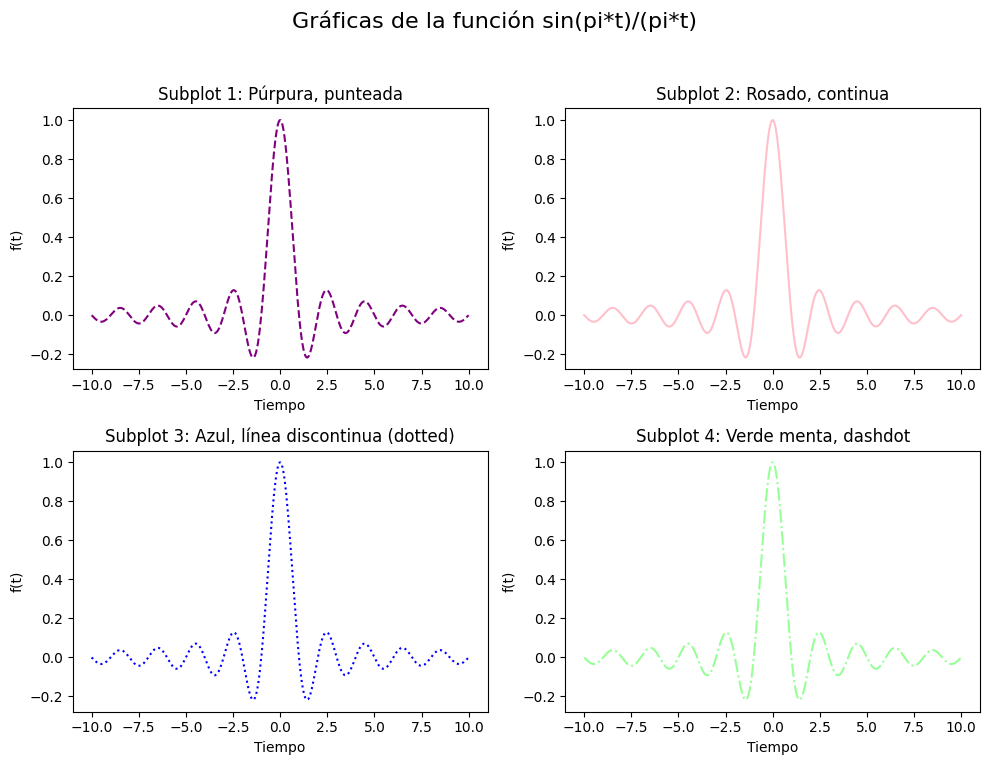

In [12]:
# Definición del dominio de tiempo
t = np.linspace(-10, 10, 400)

# Cálculo de la función f(t)=sin(pi*t)/(pi*t) usando np.sinc
y = np.sinc(t)  # np.sinc(t) equivale a sin(pi*t)/(pi*t)

# Creación de la figura con 4 subplots (2 filas x 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1: color púrpura, línea punteada ('--')
axs[0, 0].plot(t, y, color='purple', linestyle='--')
axs[0, 0].set_title('Subplot 1: Púrpura, punteada')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].set_ylabel('f(t)')

# Subplot 2: color rosado, línea continua ('-')
axs[0, 1].plot(t, y, color='pink', linestyle='-')
axs[0, 1].set_title('Subplot 2: Rosado, continua')
axs[0, 1].set_xlabel('Tiempo')
axs[0, 1].set_ylabel('f(t)')

# Subplot 3: color azul, línea punteada (dotted, ':')
axs[1, 0].plot(t, y, color='blue', linestyle=':')
axs[1, 0].set_title('Subplot 3: Azul, línea discontinua (dotted)')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('f(t)')

# Subplot 4: color verde menta, línea dashdot ('-.')
mint_green = '#98FF98'  # Código hexadecimal para verde menta
axs[1, 1].plot(t, y, color=mint_green, linestyle='-.')
axs[1, 1].set_title('Subplot 4: Verde menta, dashdot')
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].set_ylabel('f(t)')

# Título general de la figura
fig.suptitle('Gráficas de la función sin(pi*t)/(pi*t)', fontsize=16)

# Ajuste del layout para que no se solapen los títulos y etiquetas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

3. ¿En el ejercicio 1, en la linea "y = odeint(modelo, y0, t, args=(a,))" qué significa "args = (a,)”?

La expresión `args=(a,)` en la línea `y = odeint(modelo, y0, t, args=(a,))` se utiliza para pasar el parámetro adicional `a` a la función `modelo` durante la integración. Al envolver `a` en una tupla (notar la coma, esencial para definir una tupla de un solo elemento), `odeint` puede llamar a `modelo` de la forma `modelo(y, t, a)`, permitiendo que el parámetro `a` influya en la ecuación diferencial definida en la función.

4. Para el ejercicio 1, gráfique (en el mismo plot), 4 curvas de la ecuación diferencial con distintos valores de condición inicial.

In [15]:
# Definición de la ecuación diferencial
def modelo(y, t, a):
    dydt = -a * y
    return dydt

# Función para graficar la solución con 4 condiciones iniciales diferentes
def graficar_solucion(a):
    t = np.linspace(0, 5, 100)
    condiciones_iniciales = [1, 0.5, 2, 3]  # Diferentes condiciones iniciales
    colores = ['blue', 'red', 'green', 'orange']  # Colores para cada curva
    estilos_linea = ['-', '--', ':', '-.']  # Estilos de línea para diferenciar

    plt.figure(figsize=(8,6))
    
    # Resolver la ED para cada condición inicial y graficar la solución
    for y0, color, estilo in zip(condiciones_iniciales, colores, estilos_linea):
        sol = odeint(modelo, y0, t, args=(a,))
        plt.plot(t, sol, color=color, linestyle=estilo, label=f"y₀ = {y0}")
    
    plt.title(f"Solución de la ED con a = {a} para diferentes condiciones iniciales")
    plt.xlabel("Tiempo")
    plt.ylabel("y(t)")
    plt.legend()
    plt.show()

# Crear un slider para el parámetro 'a'
slider_a = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='a:')

# Conectar el slider con la función de graficar
interact(graficar_solucion, a=slider_a)

interactive(children=(FloatSlider(value=1.0, description='a:', max=5.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.graficar_solucion(a)>